In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsClassifier

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['price'] = data.target
df

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
df = df.loc[:, ['RM', 'LSTAT','PTRATIO', 'price']]
df.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [6]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      0
dtype: int64

In [7]:
df.corr()

,RM,LSTAT,PTRATIO,price
RM,1.000000,-0.613808,-0.355501,0.695360
LSTAT,-0.613808,1.000000,0.374044,-0.737663
PTRATIO,-0.355501,0.374044,1.000000,-0.507787
price,0.695360,-0.737663,-0.507787,1.000000


In [8]:
df.corr().sort_values('price')

,RM,LSTAT,PTRATIO,price
LSTAT,-0.613808,1.000000,0.374044,-0.737663
PTRATIO,-0.355501,0.374044,1.000000,-0.507787
RM,1.000000,-0.613808,-0.355501,0.695360
price,0.695360,-0.737663,-0.507787,1.000000


<AxesSubplot:>

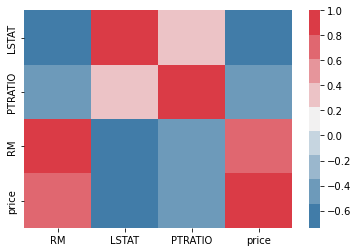

In [9]:
sns.heatmap(df.corr().sort_values(by = ['price']), cmap = sns.diverging_palette(240, 10, n=9))

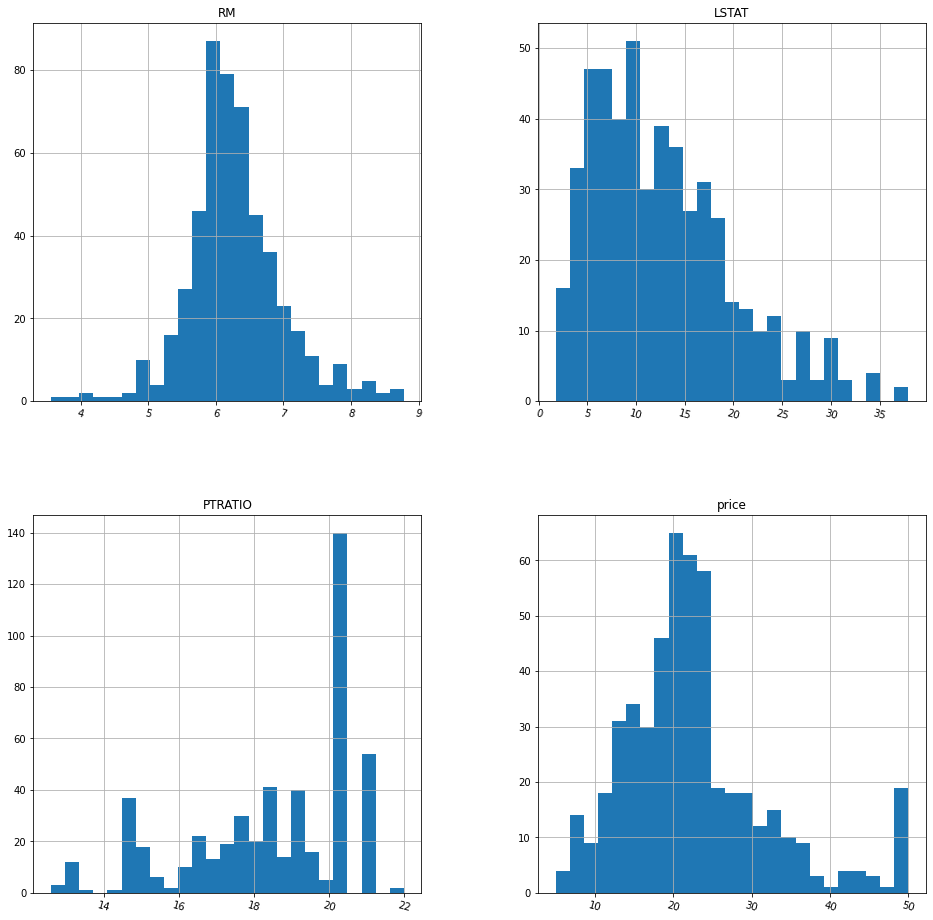

In [10]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

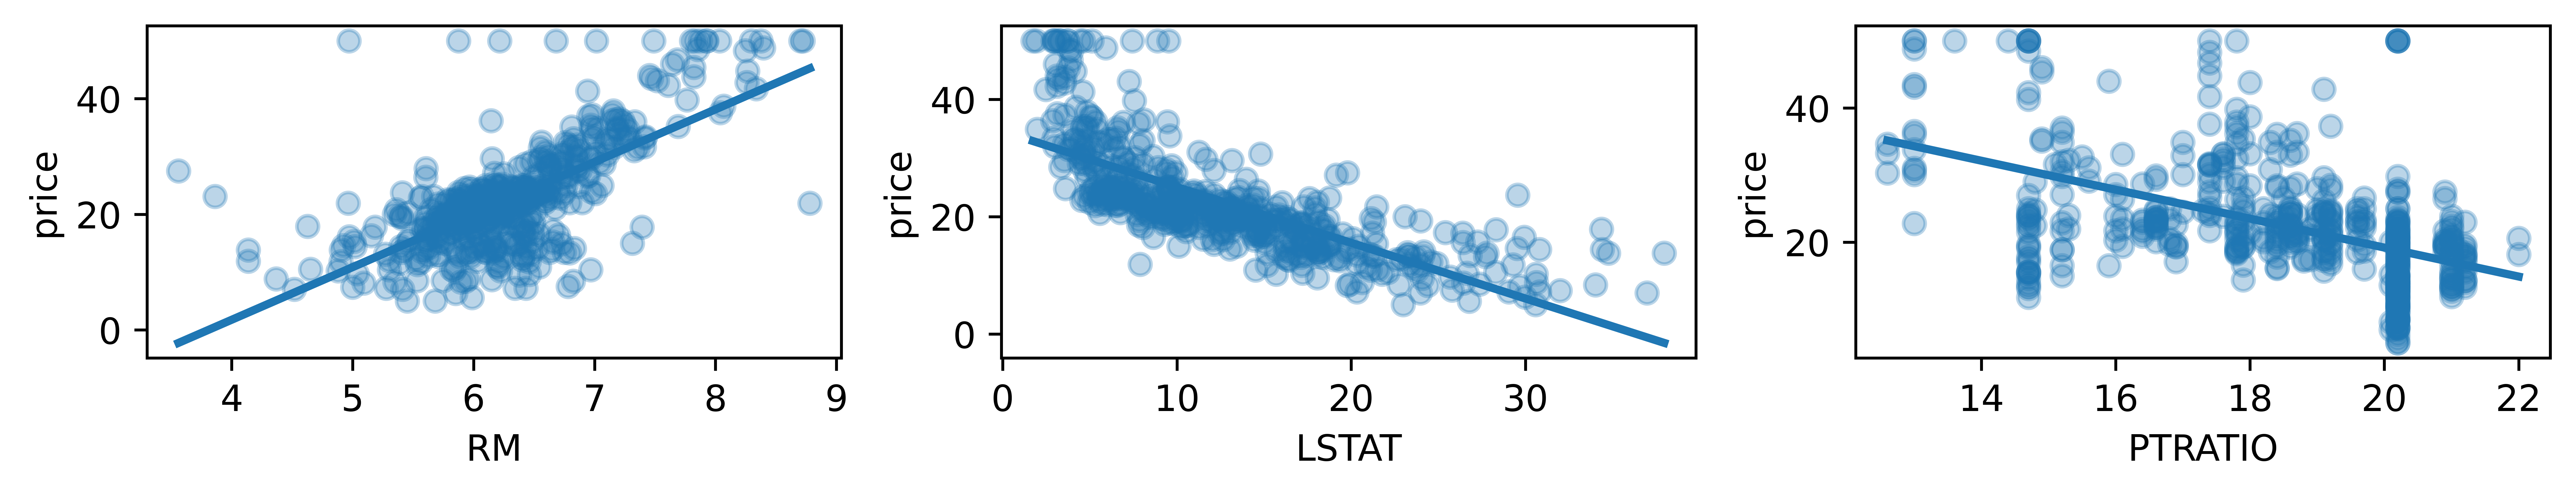

In [11]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=1000)
sns.regplot(x='RM', y='price', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='LSTAT', y='price', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='PTRATIO', y='price', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

In [12]:
X = df.loc[:, ['RM', 'LSTAT', 'PTRATIO']].values
X.shape

(506, 3)

In [13]:
y = df.loc[:, 'price'].values

In [23]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [18]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [19]:
y_pred=reg.predict(X)
r2_score(y, y_pred)

0.6786241601613112

In [24]:
mean_absolute_error(y,y_pred)

3.641793696839084

In [25]:
mean_squared_error(y,y_pred)

27.13040575849706

In [27]:
from numpy import sqrt
sqrt(mean_squared_error(y,y_pred))

5.208685607569059